In [1]:
# import libraries, other imports are as we go through encoding
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
accident = pd.read_csv('dataset/accident_data.csv')
accident.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


## Data Cleaning

In [3]:
accident.shape

(660679, 14)

In [4]:
# get all the datatypes
# date is a str
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [5]:
# number of unique values in each column
for col in accident.columns:
  print(f'{col}: {accident[col].nunique()}')

Index: 421020
Accident_Severity: 3
Accident Date: 1461
Latitude: 511618
Light_Conditions: 5
District Area: 422
Longitude: 529766
Number_of_Casualties: 36
Number_of_Vehicles: 19
Road_Surface_Conditions: 5
Road_Type: 5
Urban_or_Rural_Area: 3
Weather_Conditions: 8
Vehicle_Type: 16


In [6]:
# make a copy of accident dataframe
accident_copy = accident.copy()

In [7]:
# get general idea of min max for the numerical columns (no anomalies)
accident_copy.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


Accident Date

In [8]:
# turn dates column into three columns: day, month, year
accident_copy['Day'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[0]))
accident_copy['Month'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[1]))
accident_copy['Year'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[2]))

accident_copy['Accident_Date'] = pd.to_datetime(accident['Accident Date'], format="%d-%m-%Y")
accident_copy = accident_copy.drop(columns=['Accident Date'])

Latitude and Longitude

In [9]:
# Drop Longitude/ Latitude
accident_copy = accident_copy.dropna(subset=['Latitude'])
accident_copy = accident_copy.dropna(subset=['Longitude'])

Light_Conditions

In [10]:
# assume NaN for 'Darkness - lighting unknown'
accident_copy['Light_Conditions'] = accident['Light_Conditions'].replace('Darkness - lighting unknown', np.NaN)

District Area

In [11]:
# rename District Area so it is consistent in column formatting
accident_copy = accident_copy.rename(columns={'District Area': 'District_Area'})


Weather_Conditions

In [12]:
# weather conditions seem to have combinations, so we could one hot encode it instead
# the categories include 'Fine', 'High Winds', 'Raining', 'Snowing', 'Fog or mist', 'Other'

# first split up the labels into lists
accident_copy['Weather_Conditions_List'] = accident['Weather_Conditions'].apply(
    lambda x: ['Fine'] if x == 'Fine no high winds'
    else ['Raining'] if x == 'Raining no high winds'
    else ['Fine', 'High winds'] if x == 'Fine + high winds'
    else ['Raining', 'High winds'] if x == 'Raining + high winds'
    else ['Snowing'] if x == 'Snowing no high winds'
    else ['Fog or mist'] if x == 'Fog or mist'
    else ['Snowing', 'High winds'] if x == 'Snowing + high winds'
    else ['Other'] if x == 'Other'
    else np.NaN
)

Vehicle_Type

In [13]:
# assume NaN for 'Data missing or out of range'
accident_copy['Vehicle_Type'] = accident['Vehicle_Type'].replace('Data missing or out of range', np.NaN)

Urban_or_Rural_Area

In [14]:
# assume NaN for 'Data missing or out of range'
accident_copy['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].replace('Unallocated', np.NaN)

In [15]:
# find out the current number of missing values in the dataset
accident_copy.isnull().sum()

Index                          0
Accident_Severity              0
Latitude                       0
Light_Conditions            6484
District_Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4518
Urban_or_Rural_Area            5
Weather_Conditions         14127
Vehicle_Type                   6
Day                            0
Month                          0
Year                           0
Accident_Date                  0
Weather_Conditions_List    14127
dtype: int64

In [16]:
# drop all NaN values 
# try another vers. where we impute --> see difference in performance
#accident_copy = accident_copy.dropna()
#print(f'Before dropping missing values: {accident.shape[0]} rows')
#print(f'After dropping missing values: {accident_copy.shape[0]} rows')

In [17]:
# cleaned, but before encoding
accident_copy.head()

,Index,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year,Accident_Date,Weather_Conditions_List
0,200701BS64157,Serious,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,5,6,2019,2019-06-05,[Fine]
1,200701BS65737,Serious,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2,7,2019,2019-07-02,[Raining]
2,200701BS66127,Serious,51.517715,NaN,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,26,8,2019,2019-08-26,NaN
3,200701BS66128,Serious,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),16,8,2019,2019-08-16,[Fine]
4,200701BS66837,Slight,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,3,9,2019,2019-09-03,NaN


## Exploring Data

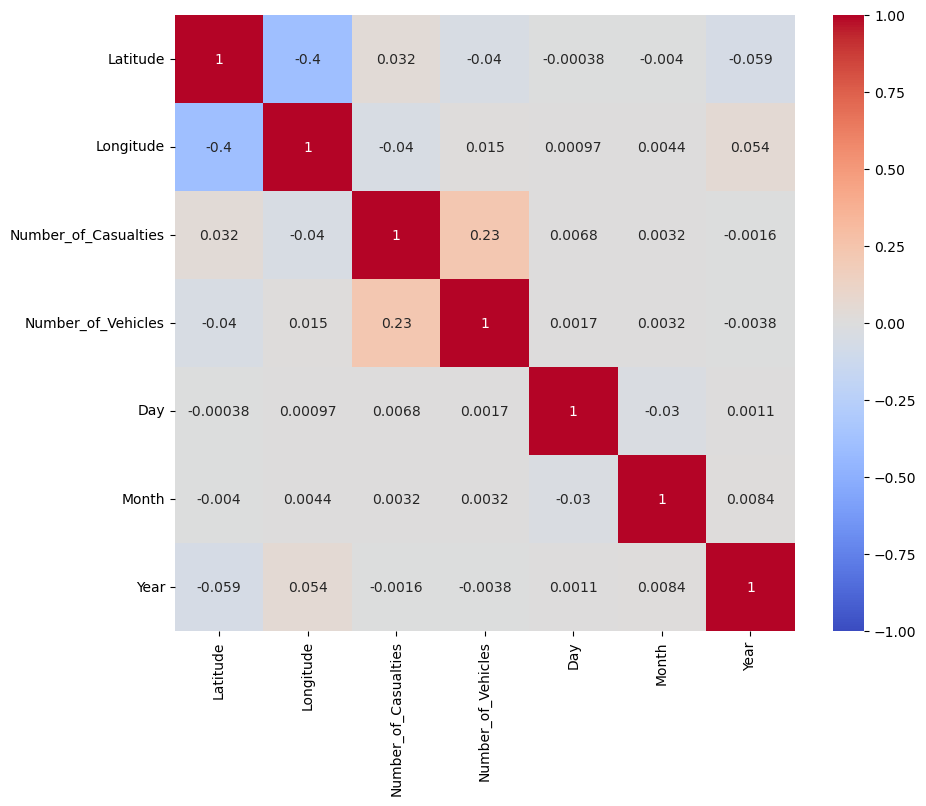

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(accident_copy.select_dtypes(include=['float64', 'int64']).corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'coolwarm')
plt.show()

In [19]:
accident_copy['Accident_Severity'].value_counts()

Accident_Severity
Slight     563780
Serious     88212
Fatal        8661
Name: count, dtype: int64

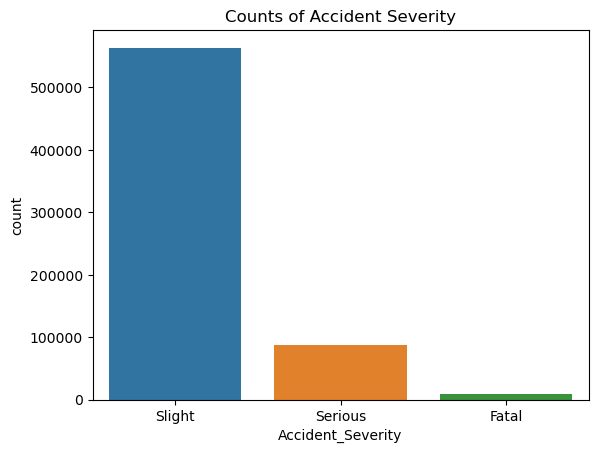

In [20]:
# our data has a lot more Slight casualties
# dont use accuracy, inbalanced datasets, find metrics (macro f1, prec/recall, class analysis, sub sampling? RF/DT/XGB)
sns.countplot(data = accident_copy, x = 'Accident_Severity', order=['Slight', 'Serious', 'Fatal'])
plt.title('Counts of Accident Severity')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


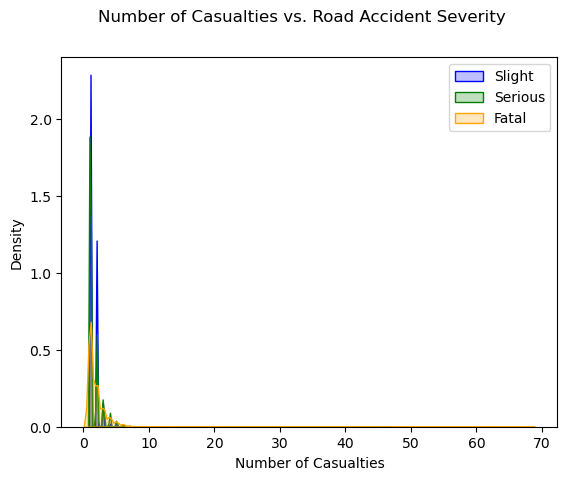

In [21]:
fig, ax = plt.subplots()

sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Slight"]["Number_of_Casualties"], fill=True, color="blue", label="Slight", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Serious"]["Number_of_Casualties"], fill=True, color="green", label="Serious", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Fatal"]["Number_of_Casualties"], fill=True, color="orange", label="Fatal", ax=ax)

ax.set_xlabel("Number of Casualties")
ax.set_ylabel("Density")

fig.suptitle("Number of Casualties vs. Road Accident Severity")

ax.legend()
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


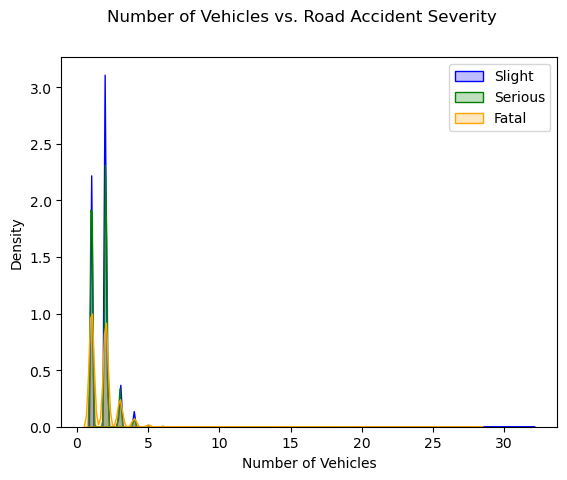

In [22]:
fig, ax = plt.subplots()

sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Slight"]["Number_of_Vehicles"], fill=True, color="blue", label="Slight", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Serious"]["Number_of_Vehicles"], fill=True, color="green", label="Serious", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Fatal"]["Number_of_Vehicles"], fill=True, color="orange", label="Fatal", ax=ax)

ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Density")

fig.suptitle("Number of Vehicles vs. Road Accident Severity")

ax.legend()
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


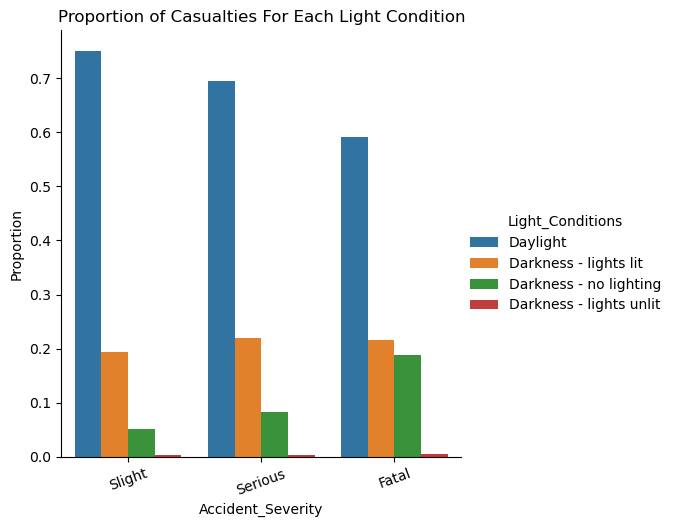

In [23]:
x,y = 'Accident_Severity', 'Light_Conditions'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.xticks(rotation=20)
plt.title('Proportion of Casualties For Each Light Condition')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


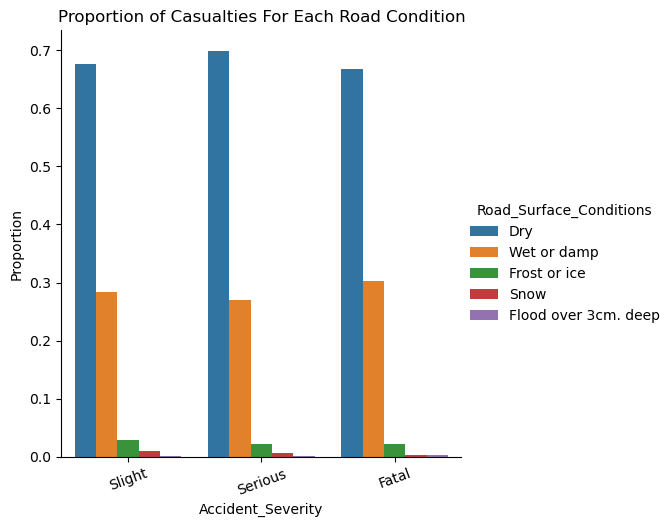

In [24]:
x,y = 'Accident_Severity', 'Road_Surface_Conditions'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.xticks(rotation=20)
plt.title('Proportion of Casualties For Each Road Condition')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


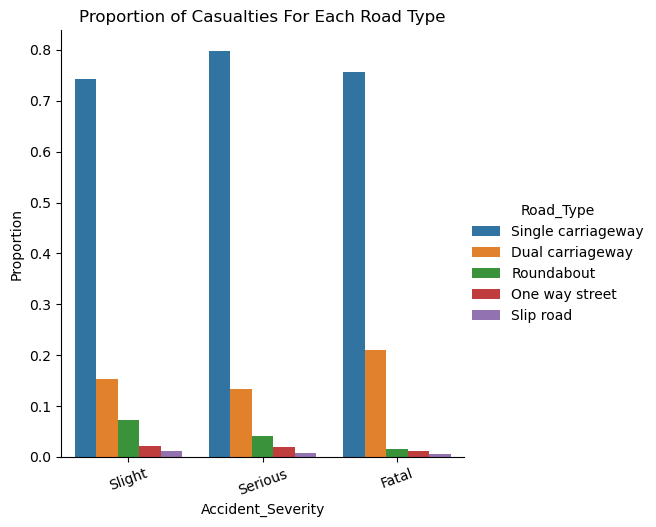

In [25]:
# exclude one way street/ roundabouts for analysis?
x,y = 'Accident_Severity', 'Road_Type'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.xticks(rotation=20)
plt.title('Proportion of Casualties For Each Road Type')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


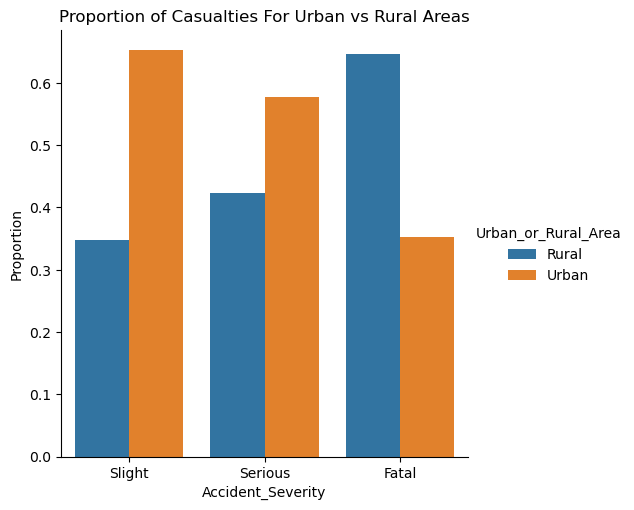

In [26]:
x,y = 'Accident_Severity', 'Urban_or_Rural_Area'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Proportion of Casualties For Urban vs Rural Areas')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


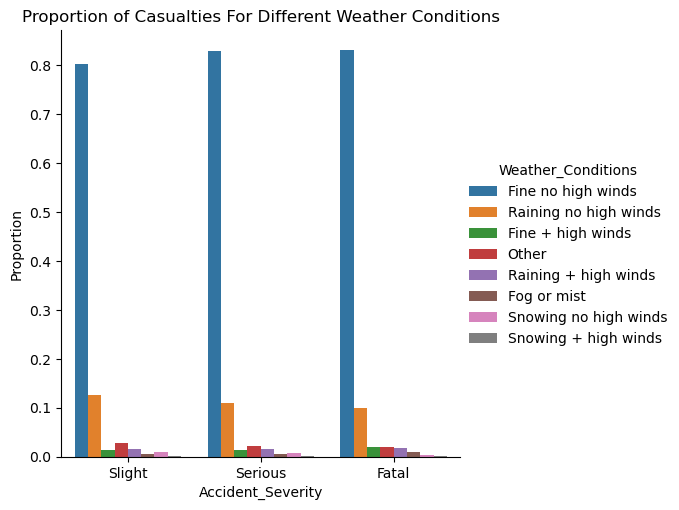

In [27]:
(accident_copy
.groupby('Accident_Severity')['Weather_Conditions']
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue='Weather_Conditions',kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Proportion of Casualties For Different Weather Conditions')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


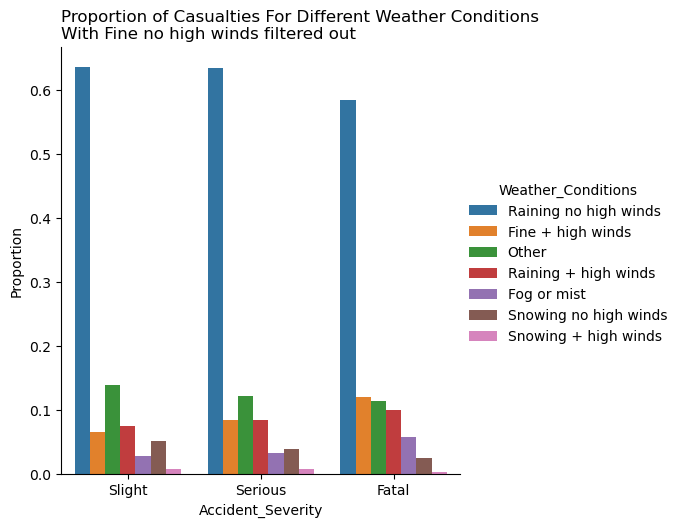

In [28]:
(accident_copy[accident_copy['Weather_Conditions']!='Fine no high winds']
.groupby('Accident_Severity')['Weather_Conditions']
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue='Weather_Conditions',kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Proportion of Casualties For Different Weather Conditions\n\
With Fine no high winds filtered out', loc='left')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


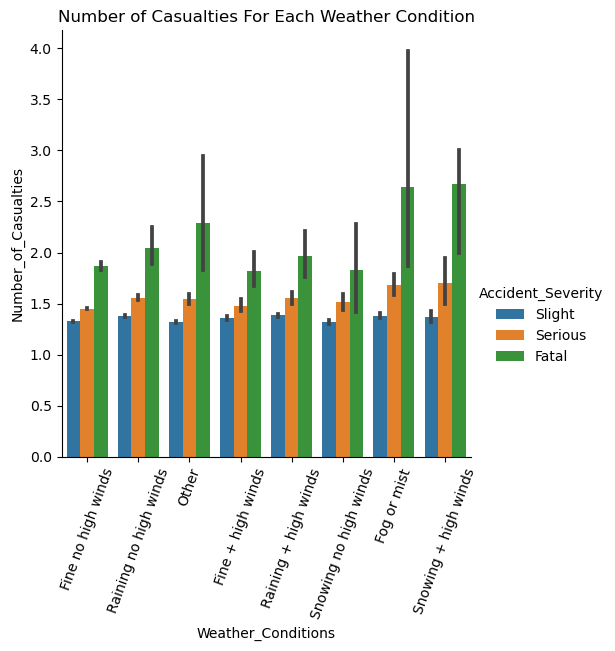

In [29]:
sns.catplot(data=accident_copy, x="Weather_Conditions", y="Number_of_Casualties", 
            hue='Accident_Severity', hue_order=['Slight', 'Serious', 'Fatal'], kind="bar")
plt.xticks(rotation=70)
plt.title('Number of Casualties For Each Weather Condition')
plt.show()

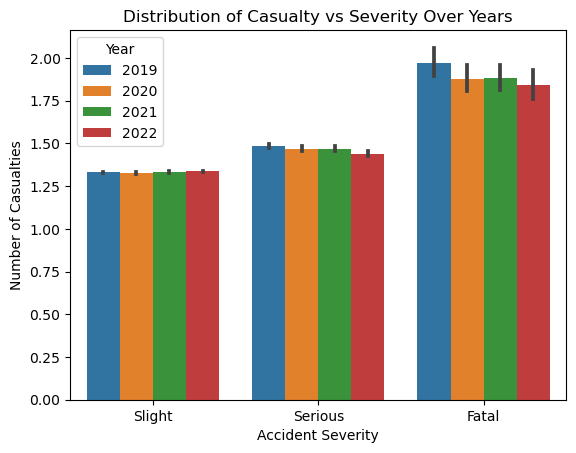

In [30]:
#accident counts over time for each severity
sns.barplot(data=accident_copy, x='Accident_Severity', y='Number_of_Casualties', 
            hue='Year', order=['Slight', 'Serious', 'Fatal'])
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty vs Severity Over Years')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


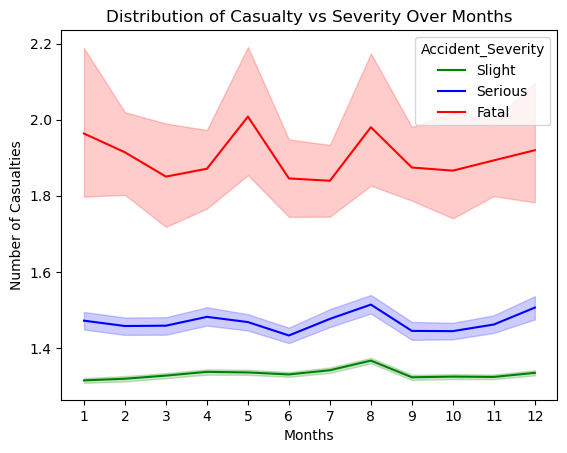

In [31]:
sns.lineplot(data=accident_copy, x='Month', y='Number_of_Casualties',
              hue='Accident_Severity', palette=['green', 'blue', 'red'],
              hue_order=['Slight', 'Serious', 'Fatal'])
plt.xlabel('Months')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty vs Severity Over Months')
plt.xticks(np.arange(1, 13))
plt.show()

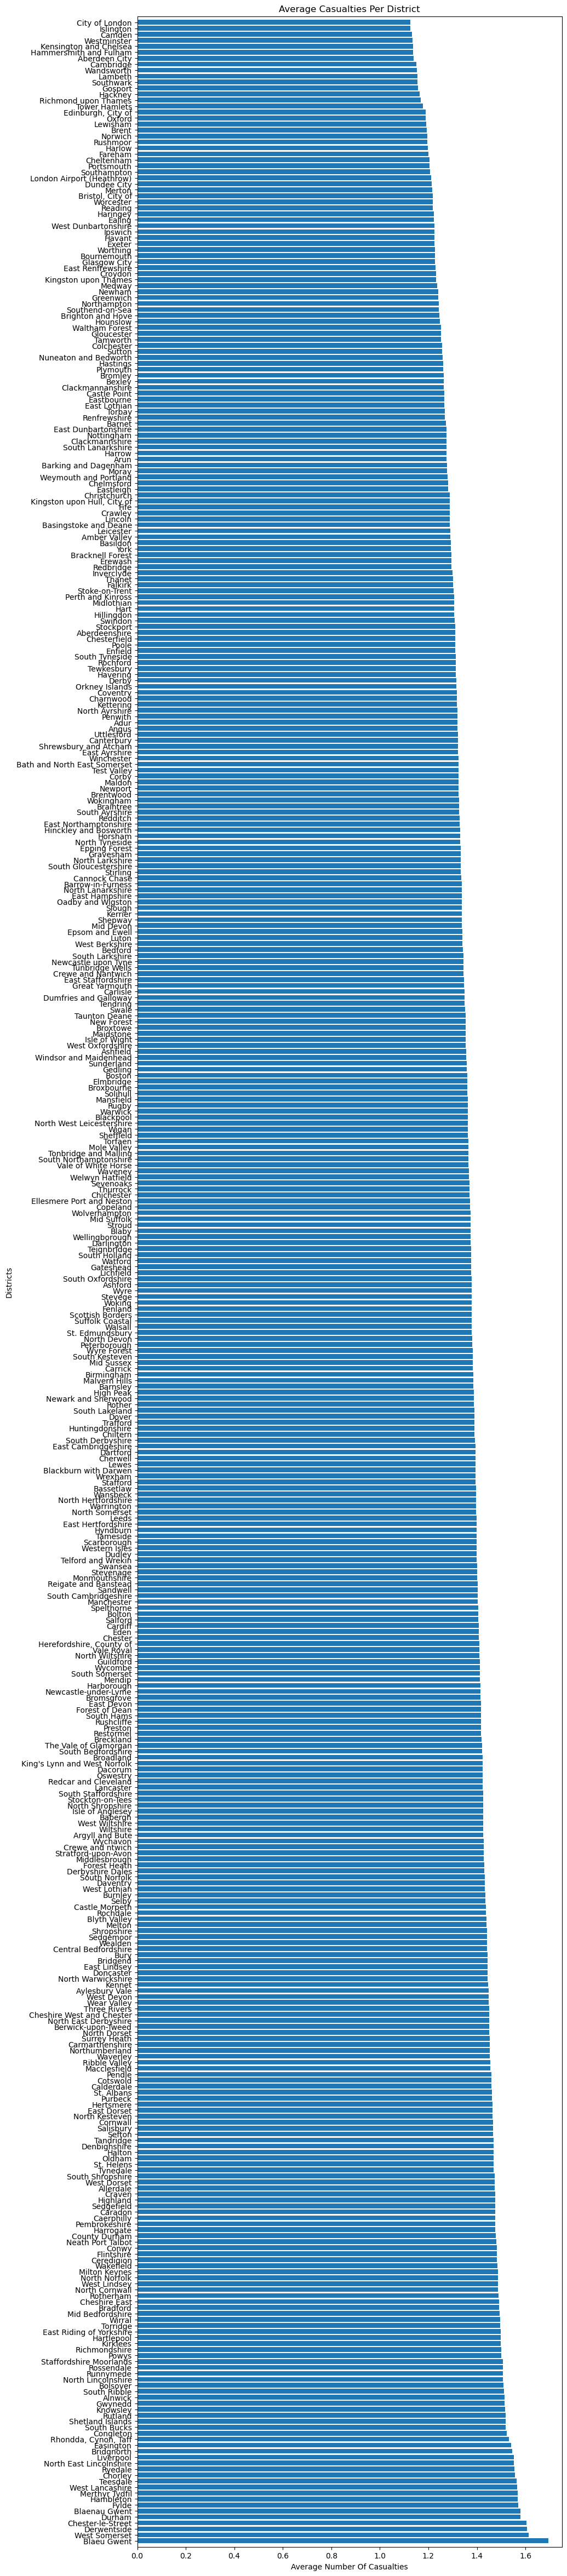

In [32]:
grouped_area = accident_copy.groupby('District_Area')['Number_of_Casualties'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,60))
plt.barh(y=grouped_area.index, width=grouped_area.values)
plt.xlim([0,1.75])
plt.ylim([-1,422])
plt.xlabel('Average Number Of Casualties')
plt.ylabel('Districts')
plt.title('Average Casualties Per District')
plt.show()

## Encoding

Because we might try out CatBoost, don't drop the OHE columns yet. CatBoost helps with categorical data I think.

In [33]:
# Use One Hot Encoder on all categorical columns except Weather_Conditions
from sklearn.preprocessing import OneHotEncoder
# categorical columns include Light_Conditions, District_Area,
# Road_Surface_Conditions, Road_Type,	Urban_or_Rural_Area,
# Weather_Conditions, Vehicle_Type

categorical = ['Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',	'Urban_or_Rural_Area', 'Vehicle_Type']

for col in categorical:
  ohe = OneHotEncoder()
  categorical_ohe = ohe.fit_transform(accident_copy[[col]]).toarray()
  df = pd.DataFrame(categorical_ohe, columns=list(ohe.categories_[0]))
  accident_copy[ohe.categories_[0]] = categorical_ohe

## Classifiers to try out for baseline

### Decision Tree (using LabelEncoding for Categorical Columns & Strictly Use of Numerical Columns)

In [34]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
#accident_copy['Light_Conditions'] = label_encoder.fit_transform(accident_copy['Light_Conditions'])
#accident_copy['Road_Surface_Conditions'] = label_encoder.fit_transform(accident_copy['Road_Surface_Conditions'])
#accident_copy['Road_Type'] = label_encoder.fit_transform(accident_copy['Road_Type'])
#accident_copy['Urban_or_Rural_Area'] = label_encoder.fit_transform(accident_copy['Urban_or_Rural_Area'])
#accident_copy['Weather_Conditions_List'] = accident_copy['Weather_Conditions_List'].apply(lambda x: label_encoder.fit_transform(x))
#accident_copy['Vehicle_Type'] = label_encoder.fit_transform(accident_copy['Vehicle_Type'])
#accident_copy['Accident_Date'] = pd.to_datetime(accident_copy['Accident_Date'])
#accident_copy['Weather_Conditions_List'].apply(lambda x: label_encoder.fit_transform(x))

In [35]:
accident_copy

,Index,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,...,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
0,200701BS64157,Serious,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200701BS65737,Serious,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200701BS66127,Serious,51.517715,NaN,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,200701BS66128,Serious,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,200701BS66837,Slight,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660675,201091NM01881,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660676,201091NM01935,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660677,201091NM01964,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Select only numeric columns for training the model
numeric_columns = ['Number_of_Casualties', 'Number_of_Vehicles', 'Month',
                    'Dual carriageway', 'Single carriageway', 'Roundabout',
                    'Rural', 'Urban']
target = 'Accident_Severity'

# Select features and target variable 
X = accident_copy[numeric_columns]
y = accident_copy[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [38]:
# Display evaluation metrics
print(f"\nAccuracy: {accuracy:.2f}")
print(f"\nF1-score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.85

F1-score: 0.31

Confusion Matrix:
[[     5     26   1695]
 [    19     96  17585]
 [    30    209 112466]]

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.09      0.00      0.01      1726
     Serious       0.29      0.01      0.01     17700
      Slight       0.85      1.00      0.92    112705

    accuracy                           0.85    132131
   macro avg       0.41      0.34      0.31    132131
weighted avg       0.77      0.85      0.79    132131



In [39]:
# Get feature importances
feature_importances = clf.feature_importances_

# Display feature importances
feature_importance_results = pd.DataFrame({'Feature': numeric_columns, 'Importance': feature_importances})
print("\nDecision Tree Feature Importances:")
feature_importance_results


Decision Tree Feature Importances:


,Feature,Importance
0,Number_of_Casualties,0.253735
1,Number_of_Vehicles,0.403068
2,Month,0.125490
3,Dual carriageway,0.018015
4,Single carriageway,0.075929
5,Roundabout,0.009669
6,Rural,0.109927
7,Urban,0.004167


In [40]:
# Select features based on the highest feature importances
selected_features_tree = feature_importance_results.sort_values(by='Importance', ascending=False)['Feature'].head(5).tolist()

# Display the selected features
print("\nTop Features Selected based on Decision Tree Feature Importances:")
print("Selected Features (Decision Tree):", selected_features_tree)


Top Features Selected based on Decision Tree Feature Importances:
Selected Features (Decision Tree): ['Number_of_Vehicles', 'Number_of_Casualties', 'Month', 'Rural', 'Single carriageway']


### Using the Top Features to assess performance to generalize the model 

In [41]:
# Select the top features based on Decision Tree feature importances
selected_features = ['Latitude', 'Longitude', 'Day', 'Month', 'Year']
target = 'Accident_Severity'

# Select features and target variable based on top features
X = accident_copy[selected_features]
y = accident_copy[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a new decision tree classifier using the selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"\nAccuracy: {accuracy:.2f}")
print(f"\nF1-score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.74

F1-score: 0.34

Confusion Matrix:
[[   44   295  1387]
 [  309  2999 14392]
 [ 1691 16376 94638]]

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.02      0.03      0.02      1726
     Serious       0.15      0.17      0.16     17700
      Slight       0.86      0.84      0.85    112705

    accuracy                           0.74    132131
   macro avg       0.34      0.34      0.34    132131
weighted avg       0.75      0.74      0.75    132131



## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Select features and target variable 
X = accident_copy[numeric_columns]
y = accident_copy[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for the random forest model
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print(f"\nF1-score: {f1_rf:.2f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.85

F1-score: 0.31

Random Forest Confusion Matrix:
[[     4     23   1699]
 [    11     81  17608]
 [    12    162 112531]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       Fatal       0.15      0.00      0.00      1726
     Serious       0.30      0.00      0.01     17700
      Slight       0.85      1.00      0.92    112705

    accuracy                           0.85    132131
   macro avg       0.44      0.34      0.31    132131
weighted avg       0.77      0.85      0.79    132131



In [43]:
# Select the top features based on Decision Tree feature importances
selected_features = ['Latitude', 'Longitude', 'Day', 'Month', 'Year']
target = 'Accident_Severity'

# Select features and target variable based on top features
X = accident_copy[selected_features]
y = accident_copy[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for the random forest model
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print(f"\nF1-score: {f1_rf:.2f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.85

F1-score: 0.31

Random Forest Confusion Matrix:
[[     1     12   1713]
 [     2    175  17523]
 [    27    728 111950]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       Fatal       0.03      0.00      0.00      1726
     Serious       0.19      0.01      0.02     17700
      Slight       0.85      0.99      0.92    112705

    accuracy                           0.85    132131
   macro avg       0.36      0.33      0.31    132131
weighted avg       0.75      0.85      0.79    132131



In [44]:
accident_copy["Accident_Severity"].value_counts()

Accident_Severity
Slight     563780
Serious     88212
Fatal        8661
Name: count, dtype: int64

In [45]:
from imblearn.over_sampling import RandomOverSampler

# Use RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for the random forest model
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print(f"\nF1-score: {f1_rf:.2f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.83

F1-score: 0.32

Random Forest Confusion Matrix:
[[     2     63   1661]
 [    15    721  16964]
 [    87   3578 109040]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       Fatal       0.02      0.00      0.00      1726
     Serious       0.17      0.04      0.07     17700
      Slight       0.85      0.97      0.91    112705

    accuracy                           0.83    132131
   macro avg       0.35      0.34      0.32    132131
weighted avg       0.75      0.83      0.78    132131



In [ ]:
y_resampled.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled_sm, y_resampled_sm = smote.fit_resample(X_train, y_train)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the resampled training data
rf_classifier.fit(X_resampled_sm, y_resampled_sm)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for the random forest model
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print(f"\nF1-score: {f1_rf:.2f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Select features and target variable 
X = accident_copy[numeric_columns]
y = accident_copy[target].replace({'Slight': 0, 'Serious': 1, 'Fatal':2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Display evaluation metrics for the random forest model
print(f"\nXGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"\nF1-score: {f1_xgb:.2f}")
print("\nnXGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("\nnXGBoost Classification Report:")
print(classification_rep_xgb)

In [ ]:
# Select the top features based on Decision Tree feature importances
selected_features = ['Latitude', 'Longitude', 'Day', 'Month', 'Year']
target = 'Accident_Severity'

# Select features and target variable based on top features
X = accident_copy[selected_features]
y = accident_copy[target].replace({'Slight': 0, 'Serious': 1, 'Fatal':2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=0)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)

# Display evaluation metrics for the random forest model
print(f"\nXGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"\nF1-score: {f1_xgb:.2f}")
print("\nXGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("\nnXGBoost Classification Report:")
print(classification_rep_xgb)

## Fairness Analysis (WIP)